# Earth Science Citation Replication Project

## 0. Install Packages

In [4]:
import csv
import pandas as pd
from time import sleep
import re
import os
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

## 1. Sampling

### Import file
Next, import the csv file that includes your records from Web of Science.

In [397]:
#Import csv

ucb_data = pd.read_csv("Berkeley_References.csv", encoding="ISO-8859-1")
cub_data = pd.read_csv("Boulder_References.csv", encoding="ISO-8859-1")
uh_data = pd.read_csv("Houston_References.csv", encoding="ISO-8859-1")

### Explore the data

Use the campus csv file to determine the top 10 journals published in by affiliated researchers. Find information about Web of Science field/header tags here: https://images.webofknowledge.com/images/help/WOS/hs_wos_fieldtags.html

In [225]:
#SO refers to source aka journal title

titles = ucb_data['SO'].value_counts()
titles.head(10)

GEOPHYSICAL RESEARCH LETTERS                   461
ATMOSPHERIC CHEMISTRY AND PHYSICS              153
WATER RESOURCES RESEARCH                       150
EARTH AND PLANETARY SCIENCE LETTERS            133
JOURNAL OF GEOPHYSICAL RESEARCH-SOLID EARTH    132
GEOCHIMICA ET COSMOCHIMICA ACTA                128
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES    100
GEOPHYSICAL JOURNAL INTERNATIONAL               96
ENVIRONMENTAL RESEARCH LETTERS                  92
ATMOSPHERIC ENVIRONMENT                         72
Name: SO, dtype: int64

In [226]:
titles_cub = cub_data['SO'].value_counts()
titles_cub.head(10)

GEOPHYSICAL RESEARCH LETTERS                       843
ATMOSPHERIC CHEMISTRY AND PHYSICS                  643
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES        600
ATMOSPHERIC MEASUREMENT TECHNIQUES                 204
JOURNAL OF CLIMATE                                 190
BULLETIN OF THE AMERICAN METEOROLOGICAL SOCIETY    139
WATER RESOURCES RESEARCH                           116
ATMOSPHERIC ENVIRONMENT                            111
MONTHLY WEATHER REVIEW                             105
EARTH AND PLANETARY SCIENCE LETTERS                 95
Name: SO, dtype: int64

In [239]:
titles_uh = uh_data['SO'].value_counts()
titles_uh.head(10)

GEOPHYSICS                                                                          77
ATMOSPHERIC ENVIRONMENT                                                             62
ATMOSPHERIC CHEMISTRY AND PHYSICS                                                   53
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES                                         45
EARTH AND PLANETARY SCIENCE LETTERS                                                 30
GEOCHIMICA ET COSMOCHIMICA ACTA                                                     28
GEOPHYSICAL RESEARCH LETTERS                                                        26
IEEE TRANSACTIONS ON GEOSCIENCE AND REMOTE SENSING                                  25
IEEE JOURNAL OF SELECTED TOPICS IN APPLIED EARTH OBSERVATIONS AND REMOTE SENSING    25
CRYSTAL GROWTH & DESIGN                                                             25
Name: SO, dtype: int64

### Create a sample

Our total number of records is: 17648 

Let's compute the proportion of the total for each institution.

In [391]:
total = 7439 + 5002 + 3862 + 1344
CUB = 7439/total
UCB = 5002/total
UCLA = 3862/total
UH = 1344/total

print('Total = ',total)
print('CUB = ',CUB)
print('UCB = ',UCB)
print('UCLA = ',UCLA)
print('UH = ',UH)

Total =  17647
CUB =  0.4215447384824616
UCB =  0.2834476114920383
UCLA =  0.2188473961579872
UH =  0.07616025386751289


|Institution | Number of Records | Proportion of Total | Sample (n = 1000)|
|:--- | ---: | ---: | ---: |
|CU Boulder | 7439 | .42 | 420|
|UC Berkeley | 5002 | .28 | 280|
|UCLA | 3862 | .22 | 220 |
|UH | 1344 | .08 | 80 |

By using `dataframe.sample`, we can generate a random sample. Our total sample will be 1000 records.
Create your sample based on your institution's proportion of the whole set of records. Use that proportion to calculate your n out of 1000.

In [7]:
#Example:
#ucb_sample = ucb_data.sample(n = 280)
#ucb_sample

CUB_Sample = data.sample(n = 420)
CUB_Sample['INSTITUTION'] = 'CUBoulder'
CUB_Sample

,Institution,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
1289,CUBoulder,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,20,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/2020
1320,CUBoulder,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,20,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/2020
1716,CUBoulder,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,20,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/2020
4787,CUBoulder,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,25,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
245,CUBoulder,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,13,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,CUBoulder,J,"Castendyk, D; McKnight, D; Welch, K; Niebuhr, ...",NaN,NaN,NaN,"Castendyk, Devin; McKnight, Diane; Welch, Kath...",NaN,NaN,"Pressure-driven, shoreline currents in a peren...",...,20,Water Resources,Water Resources,CG2JP,WOS:000353101000011,NaN,NaN,NaN,NaN,6/19/2020
2243,CUBoulder,J,"Mccoy, TJ; Marquardt, AE; Wasson, JT; Ash, RD;...",NaN,NaN,NaN,"Mccoy, Timothy J.; Marquardt, Amy E.; Wasson, ...",NaN,NaN,"The Anoka, Minnesota iron meteorite as parent ...",...,10,"Anthropology; Archaeology; Geosciences, Multid...",Anthropology; Archaeology; Geology,EV6NC,WOS:000401885100002,NaN,Bronze,NaN,NaN,6/19/2020
5453,CUBoulder,J,"Hanna, E; Jones, JM; Cappelen, J; Mernild, SH;...",NaN,NaN,NaN,"Hanna, Edward; Jones, Julie M.; Cappelen, John...",NaN,NaN,The influence of North Atlantic atmospheric an...,...,19,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,104EE,WOS:000315972400007,NaN,NaN,NaN,NaN,6/19/2020
4983,CUBoulder,J,"Yue, J; Xu, JY; Chang, LC; Wu, Q; Liu, HL; Lu,...",NaN,NaN,NaN,"Yue, Jia; Xu, Jiyao; Chang, Loren C.; Wu, Qian...",NaN,NaN,Global structure and seasonal variability of t...,...,8,Geochemistry & Geophysics; Meteorology & Atmos...,Geochemistry & Geophysics; Meteorology & Atmos...,278TQ,WOS:000328913100021,NaN,NaN,NaN,NaN,6/19/2020


### Export your file

In [8]:
#Export csv

cub_sample.to_csv('cub_sample.csv')

### Create one file from all institutions

Combine 4 csvs into 1 file, and confirm that file includes 1000 records.

## 2. Data Clean up

In [395]:
#Import full csv with all samples.

data = pd.read_csv("master_sample.csv", encoding="ISO-8859-1")
data

,Unnamed: 0,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,WC,SC,GA,UT,PM,OA,HC,HP,DA,INSTITUTION
0,1289,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/20,CUBoulder
1,1320,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/20,CUBoulder
2,1716,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/20,CUBoulder
3,4787,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/20,CUBoulder
4,245,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/20,CUBoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,432,J,"Rangarajan, R; Laskar, AH; Bhattacharya, SK; S...",NaN,NaN,NaN,"Rangarajan, Ravi; Laskar, Amzad H.; Bhattachar...",NaN,NaN,An insight into the western Pacific wintertime...,...,"Engineering, Civil; Geosciences, Multidiscipli...",Engineering; Geology; Water Resources,ER5VE,WOS:000398871100009,NaN,NaN,NaN,NaN,7/16/20,Houston
996,316,J,"Ahmad, L; Khan, SD; Shah, MT; Jehan, N",NaN,NaN,NaN,"Ahmad, Laeiq; Khan, Shuhab D.; Shah, M. Tahir;...",NaN,NaN,"Gold mineralization in Bubin area, Gilgit-Balt...",...,"Geosciences, Multidisciplinary",Geology,FU1NZ,WOS:000423618000007,NaN,NaN,NaN,NaN,7/16/20,Houston
997,698,J,"Baier, BC; Brune, WH; Lefer, BL; Miller, DO; M...",NaN,NaN,NaN,"Baier, Bianca C.; Brune, William H.; Lefer, Ba...",NaN,NaN,Direct ozone production rate measurements and ...,...,NaN,NaN,NaN,WOS:000356991000010,NaN,NaN,NaN,NaN,NaN,Houston
998,839,J,"Hossain, F; Siddique-E-Akbor, AHM; Yigzaw, W; ...",NaN,NaN,NaN,"Hossain, Faisal; Siddique-E-Akbor, A. H. M.; Y...",NaN,NaN,"CROSSING THE ""VALLEY OF DEATH"" Lessons Learned...",...,NaN,NaN,NaN,WOS:000342552400008,NaN,NaN,NaN,NaN,NaN,Houston


In [90]:
top_pub = data['SO'].value_counts()
top_pub.head(30)

GEOPHYSICAL RESEARCH LETTERS                                            96
ATMOSPHERIC CHEMISTRY AND PHYSICS                                       57
JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES                             37
WATER RESOURCES RESEARCH                                                21
JOURNAL OF GEOPHYSICAL RESEARCH-SOLID EARTH                             21
EARTH AND PLANETARY SCIENCE LETTERS                                     19
JOURNAL OF CLIMATE                                                      16
ATMOSPHERIC ENVIRONMENT                                                 16
ENVIRONMENTAL RESEARCH LETTERS                                          15
GEOPHYSICAL JOURNAL INTERNATIONAL                                       15
GEOCHIMICA ET COSMOCHIMICA ACTA                                         14
JOURNAL OF GEOPHYSICAL RESEARCH-PLANETS                                 14
REMOTE SENSING                                                          13
BULLETIN OF THE AMERICAN 

In [4]:
#Select three columns: Cited References, DOI of paper, and Institution
citedref = data[['CR', 'DI', 'INSTITUTION']]
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Arnault J, 2016, J HYDROMETEOROL, V17, P1489, ...",10.1175/MWR-D-17-0238.1,CUBoulder
2,"AMAP, 2017, SNOW WAT IC PERM ARC; AMAP, 2011, ...",NaN,CUBoulder
3,"Aires Filipe, 2014, Journal of Climate, V27, P...",10.5194/acp-14-8343-2014,CUBoulder
4,"ATKINSON R, 1987, INT J CHEM KINET, V19, P799,...",10.5194/acp-19-11253-2019,CUBoulder
...,...,...,...
995,"Araguas-Araguas L, 2000, HYDROL PROCESS, V14, ...",10.1016/j.jhydrol.2017.01.047,Houston
996,"Ahmad L, 2016, EARTH SCI INFORM, V9, P113, DOI...",10.1007/s12517-017-3354-9,Houston
997,NaN,10.1016/j.atmosenv.2015.05.033,Houston
998,NaN,10.1175/BAMS-D-13-00176.1,Houston


For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
*See notes later

In [5]:
citedref = (citedref.set_index(citedref.columns.drop('CR',1).tolist())
   ...:    .CR.str.split('; ', expand=True)
   ...:    .stack()
   ...:    .reset_index()
   ...:    .rename(columns={0:'CR'})
   ...:    .loc[:, citedref.columns]
   ...: )
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder
...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston


#### Quickly summarize how many cited references by institution:

In [6]:
citedref_summary = citedref.groupby('INSTITUTION').count()
citedref_summary

,CR,DI
INSTITUTION,,
Berkeley,16851,15990
CUBoulder,24042,22785
Houston,1602,1602
UCLA,13085,13085


#### Does it add up?

In [7]:
citedref_summary.CR.sum()

55580

#### Yep! 

#### Now... 
Rather than trying to split the unstructured, dirty data, we'll use regex to pull out the DOI into new column:

In [8]:
citedref['citedDOI'] = citedref['CR'].str.extract('(10\.\S*[^,\s])', expand=True)[0]
citedref['citedDOI'] = citedref.citedDOI.str.rstrip(']')

In [9]:
citedref

,CR,DI,INSTITUTION,citedDOI
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder,10.1007/s10584-016-1750-x
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder,10.1175/MWR3123.1
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder,10.1002/2014JD022602
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder,10.1175/JCLI-D-14-00623.1
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder,10.1029/2008GL035481
...,...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston,NaN
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston,10.1016/j.mineng.2013.03.010
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston,NaN
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston,NaN


Sample of 500 from ucb_citedref+split to test CrossRef for journal metadata

### Export this to CSV:

In [159]:
citedref.to_csv('citedRef_master.csv', encoding='utf-8')

## Crossref

#### Rather than cleaning up the sloppy citation data, we'll use the articles' DOIs to get the journal metadata from the CrossRef API. We'll start by creating variables for the APIs url and the header we'll need to send along with it.

*Note: insert you're own email into the header* 

In [ ]:
url = 'http://api.crossref.org/works/'
header = {'User-Agent': 'EarthSciCitations (https://github.com/samteplitzky/Earth-Science-Citation-Replication-Project; mailto:steplitz@berkeley.edu)'}

Now we'll use requests to send a query for each DOI to the CrossRef API. this will get the article metadata from CrossRef, write to new csv.

*This takes a loooooooooong time to run!. Best to execute at the end of your work day. Should be completed by tomorrow. It took ten hours when I ran it.*

In [162]:
with open('CR_SampleTestOut.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Inst','citingDOI','CR','citedDOI', 'title', 'journal_book', 'date','issn1', 'issn1Type', 'issn2', 'issn2Type', 'isbn'])
    for i, row in ucbCRsample.iterrows():
        sleep(.2)
        if pd.notna(row['citedDOI']):
            query = url+row['citedDOI']
            #print(query)
            response = requests.get(query, headers=header)
            if response.status_code == 200:
                data = json.loads(response.content.decode('utf-8'))
                
                if 'container-title' in data['message']:
                    journal = data['message']['container-title']
                    if len(journal) > 0:
                        journal = journal[0]
                    else: journal = 'nan'                    
                else:
                    journal='nan'
                    
                year = data['message']['created']['date-parts'][0][0]
                
                if 'title' in data['message']:
                    title = data['message']['title']
                    if len(title) > 0:
                        title = title[0]
                    else:
                        title = 'nan'
                else:
                    title='nan'
                    
                if 'ISBN' in data['message']:                     
                    isbn = data['message']['ISBN'][0]
                    
                    writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan', isbn])
                else:
                    
                    if 'ISSN' in data['message']:
                        issn1 = data['message']['issn-type'][0]['value']
                        issn1Type = data['message']['issn-type'][0]['type']
                        
                        if len(data['message']['issn-type'])>1:
                            issn2 = data['message']['issn-type'][1]['value']
                            issn2Type = data['message']['issn-type'][1]['type']
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, issn2, issn2Type,'nan'])
                        
                        else:
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, 'nan', 'nan','nan'])
            else:
                writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'],'nan','nan', 'nan', 'nan', 'nan', 'nan', 'nan','nan'])
        else:
            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], 'nan','nan','nan', 'nan', 'nan', 'nan', 'nan','nan'])

http://api.crossref.org/works/10.1111/j.1466-8238.2010.00551.x
http://api.crossref.org/works/10.1016/j.advwatres.2014.04.001
http://api.crossref.org/works/10.2307/1565446
http://api.crossref.org/works/10.1130/G32294.1
http://api.crossref.org/works/10.1029/1999JA000188
http://api.crossref.org/works/10.1016/j.lithos.2006.04.002
http://api.crossref.org/works/10.1016/j.ijms.2015.08.011
http://api.crossref.org/works/10.1186/1471-2105-11-395
http://api.crossref.org/works/10.1002/2015JA021358
http://api.crossref.org/works/10.1016/S0038-0717(01)00096-7
http://api.crossref.org/works/10.1080/02786826.2016.1147645
http://api.crossref.org/works/10.1139/e76-131
http://api.crossref.org/works/10.1029/2008GL036194
http://api.crossref.org/works/10.5194/se-2-25-2011
http://api.crossref.org/works/10.1890/0012-9658(2000)081[2359:MESELD]2.0.CO;2
http://api.crossref.org/works/10.2136/sssaj1999.6351188x
http://api.crossref.org/works/10.1017/S0033822200039072
http://api.crossref.org/works/10.1029/2004JD005124

http://api.crossref.org/works/10.1016/j.envpol.2006.04.013
http://api.crossref.org/works/10.1002/wrcr.20089
http://api.crossref.org/works/10.1029/93WR01038
http://api.crossref.org/works/10.1016/j.gca.2007.11.039
http://api.crossref.org/works/10.1023/B:JARM.0000047315.57162.b7
http://api.crossref.org/works/10.1021/es300311h
http://api.crossref.org/works/10.1017/S0373463300000333
http://api.crossref.org/works/10.1111/pala.12255
http://api.crossref.org/works/10.1016/j.egypro.2009.01.012
http://api.crossref.org/works/10.5194/acp-11-2399-2011
http://api.crossref.org/works/10.1029/2004JD005029
http://api.crossref.org/works/10.1021/es202609q
http://api.crossref.org/works/10.1021/ac010027g
http://api.crossref.org/works/10.1017/CB09780511807442
http://api.crossref.org/works/10.1002/grl.50974
http://api.crossref.org/works/10.1029/2002GB001910
http://api.crossref.org/works/10.1002/2015JG002997
http://api.crossref.org/works/10.1007/s10040-004-0411-8
http://api.crossref.org/works/10.1021/ac9908905


http://api.crossref.org/works/10.2138/rmg.2009.70.1
http://api.crossref.org/works/10.1016/j.rse.2016.06.018
http://api.crossref.org/works/10.1071/MF09300
http://api.crossref.org/works/10.1107/S0907444909052925
http://api.crossref.org/works/10.5194/angeo-30-867-2012
http://api.crossref.org/works/10.1029/97JB01168
http://api.crossref.org/works/10.1016/j.tust.2017.05.005
http://api.crossref.org/works/10.1016/j.marpetgeo.2009.03.006
http://api.crossref.org/works/10.1111/let.12072
http://api.crossref.org/works/10.1111/j.1365-2486.2008.01626.x
http://api.crossref.org/works/10.1002/2017JA023952
http://api.crossref.org/works/10.1029/2002GL015184
http://api.crossref.org/works/10.1016/0883-2927(96)00010-8
http://api.crossref.org/works/10.1007/s10750-013-1634-2
http://api.crossref.org/works/10.1007/s11214-012-9943-8
http://api.crossref.org/works/10.1029/2000JB900329
http://api.crossref.org/works/10.1130/0016-7606(2002)114<0334:LQPOTC>2.0.CO;2
http://api.crossref.org/works/10.1107/S090744491100131

## All done? Yay, good morning!
read in the new citedRefsMeta.csv file to a pandas dataframe:

In [6]:
citedRefsMeta = pd.read_csv('citedRefsMeta.csv', encoding='utf-8')

In [7]:
citedRefsMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
0,CUBoulder,10.1029/2017JD028081,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1007/s10584-016-1750-x,Projected changes in tropical cyclone activity...,Climatic Change,2016.0,0165-0009,print,1573-1480,electronic,NaN
1,CUBoulder,10.1029/2017JD028081,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1175/MWR3123.1,Interpretation of Enhanced Integrated Water Va...,Monthly Weather Review,2006.0,0027-0644,print,1520-0493,electronic,NaN
2,CUBoulder,10.1029/2017JD028081,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1002/2014JD022602,The summer 2012 Greenland heat wave: In situ a...,Journal of Geophysical Research: Atmospheres,2015.0,2169-897X,print,NaN,NaN,NaN
3,CUBoulder,10.1029/2017JD028081,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1175/JCLI-D-14-00623.1,Evaluating Observation Influence on Regional W...,Journal of Climate,2015.0,0894-8755,print,1520-0442,electronic,NaN
4,CUBoulder,10.1029/2017JD028081,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2008GL035481,Extreme changes in stable hydrogen isotopes an...,Geophysical Research Letters,2008.0,0094-8276,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55575,Houston,10.1007/s12517-017-3354-9,"Robb LJ., 2013, INTRO ORE FORMING PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55576,Houston,10.1007/s12517-017-3354-9,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1016/j.mineng.2013.03.010,Rare Earth Element deportment studies utilisin...,Minerals Engineering,2013.0,0892-6875,print,NaN,NaN,NaN
55577,Houston,10.1007/s12517-017-3354-9,"Sweatman T, 1995, AUST AGEN INT DEV, V91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55578,Houston,10.1007/s12517-017-3354-9,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Isolate Journal and Book Titles

In [8]:
citedRefsMeta['journal_book']

0                                     Climatic Change
1                              Monthly Weather Review
2        Journal of Geophysical Research: Atmospheres
3                                  Journal of Climate
4                        Geophysical Research Letters
                             ...                     
55575                                             NaN
55576                            Minerals Engineering
55577                                             NaN
55578                                             NaN
55579                            Geoscience Frontiers
Name: journal_book, Length: 55580, dtype: object

**Follow up**: You may notice the appears of Nan or null values in the 'journal_book' column. We will ignore these for now, but note how many there are for future data clean up.

In [9]:
citedRefsMeta['journal_book'].isna().sum()

11280

In [10]:
citedRefsMeta['citedDOI'].isna().sum()

10635

#### Take Counts for each title

The following five cells leads you through the steps needed to visualize the 80/20 rule (do 80% of citations come from 20% of titles). You will:
- count the number of times a journal title is cited
- create a cumulative summation of the counts
- calculate the title percent (each additional title is what percent of the total?)
- calculate the citation percent (each title accounts for what percent of total citations?)

In [11]:
citedRefsMeta_count = citedRefsMeta['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_count.head(10)

,journal_book,counts
0,Journal of Geophysical Research,2509
1,Geophysical Research Letters,2451
2,Atmospheric Chemistry and Physics,1310
3,Journal of Climate,1241
4,Science,1225
5,Nature,1077
6,Journal of Geophysical Research: Atmospheres,1045
7,Earth and Planetary Science Letters,827
8,Journal of Geophysical Research: Space Physics,792
9,Journal of the Atmospheric Sciences,734


In [12]:
citedRefsMeta_count['cumsum'] = citedRefsMeta_count['counts'].cumsum()
citedRefsMeta_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,2509,2509
1,Geophysical Research Letters,2451,4960
2,Atmospheric Chemistry and Physics,1310,6270
3,Journal of Climate,1241,7511
4,Science,1225,8736
...,...,...,...
2710,Invertebrate Biology,1,44296
2711,WSQ: Women's Studies Quarterly,1,44297
2712,ACM Computing Surveys,1,44298
2713,Imaging Spectrometry V,1,44299


In [13]:
citedRefsMeta_count['titlenum'] = range(1, 1+len(citedRefsMeta_count))
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,2509,2509,1
1,Geophysical Research Letters,2451,4960,2
2,Atmospheric Chemistry and Physics,1310,6270,3
3,Journal of Climate,1241,7511,4
4,Science,1225,8736,5
...,...,...,...,...
2710,Invertebrate Biology,1,44296,2711
2711,WSQ: Women's Studies Quarterly,1,44297,2712
2712,ACM Computing Surveys,1,44298,2713
2713,Imaging Spectrometry V,1,44299,2714


In [14]:
citedRefsMeta_count['titlepct'] = 100*(citedRefsMeta_count.titlenum/2715)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,2509,2509,1,0.036832
1,Geophysical Research Letters,2451,4960,2,0.073665
2,Atmospheric Chemistry and Physics,1310,6270,3,0.110497
3,Journal of Climate,1241,7511,4,0.147330
4,Science,1225,8736,5,0.184162
...,...,...,...,...,...
2710,Invertebrate Biology,1,44296,2711,99.852670
2711,WSQ: Women's Studies Quarterly,1,44297,2712,99.889503
2712,ACM Computing Surveys,1,44298,2713,99.926335
2713,Imaging Spectrometry V,1,44299,2714,99.963168


In [15]:
citedRefsMeta_count['citationpct'] = 100*citedRefsMeta_count['cumsum']/(44300)
citedRefsMeta_count.head(10)

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,2509,2509,1,0.036832,5.663657
1,Geophysical Research Letters,2451,4960,2,0.073665,11.196388
2,Atmospheric Chemistry and Physics,1310,6270,3,0.110497,14.153499
3,Journal of Climate,1241,7511,4,0.147330,16.954853
4,Science,1225,8736,5,0.184162,19.720090
5,Nature,1077,9813,6,0.220994,22.151242
6,Journal of Geophysical Research: Atmospheres,1045,10858,7,0.257827,24.510158
7,Earth and Planetary Science Letters,827,11685,8,0.294659,26.376975
8,Journal of Geophysical Research: Space Physics,792,12477,9,0.331492,28.164786
9,Journal of the Atmospheric Sciences,734,13211,10,0.368324,29.821670


## Plot 80/20 rule

The cell below will tell you what percent of titles are represented by 80% of the total citations?

In [16]:
n = citedRefsMeta_count.loc[citedRefsMeta_count['citationpct'] <= 80.25]
n

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,2509,2509,1,0.036832,5.663657
1,Geophysical Research Letters,2451,4960,2,0.073665,11.196388
2,Atmospheric Chemistry and Physics,1310,6270,3,0.110497,14.153499
3,Journal of Climate,1241,7511,4,0.147330,16.954853
4,Science,1225,8736,5,0.184162,19.720090
...,...,...,...,...,...,...
212,Plant Physiology,28,35424,213,7.845304,79.963883
213,"Arctic, Antarctic, and Alpine Research",28,35452,214,7.882136,80.027088
214,PALAIOS,28,35480,215,7.918969,80.090293
215,Cold Regions Science and Technology,28,35508,216,7.955801,80.153499


In [17]:
ind=np.argmin(abs(80.-citedRefsMeta_count.citationpct))
pctile = citedRefsMeta_count.titlepct[ind]
pctile

7.8821362799263355

Plot 80/20 rule using the code below:

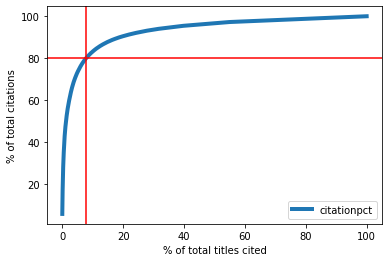

In [18]:
newlines = citedRefsMeta_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
newlines.axhline(y=80, color='r')
newlines.axvline(x=pctile, color='r')
newlines.set_ylabel('% of total citations')
newlines.set_xlabel('% of total titles cited')
plt.show()

## Plot 80/20 rule for your institution

Repeat the steps above to plot the 80/20 for your institution. Create a new dataframe for your institution. Then substitute a term for your institution in the place of "ucb" or Berkeley as needed.

In [19]:
#Example
citedRefsMeta_ucb = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'Berkeley']
citedRefsMeta_ucb

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
24042,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Abrahamson N., 2013, 201304 PEER U CAL, P143",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24043,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Abrahamson N, 2016, EARTHQ SPECTRA, V32, P23, ...",10.1193/051712EQS188MR,BC Hydro Ground Motion Prediction Equations fo...,Earthquake Spectra,2015.0,8755-2930,print,1944-8201,electronic,NaN
24044,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Ancheta T.D., 2013, 201303 PEER U CAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24045,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Ashford SA, 2002, J GEOTECH GEOENVIRON, V128, ...",10.1061/(ASCE)1090-0241(2002)128:2(119),Simplified Method for Evaluating Seismic Stabi...,Journal of Geotechnical and Geoenvironmental E...,2002.0,1090-0241,print,1943-5606,electronic,NaN
24046,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Atkinson GM, 2003, B SEISMOL SOC AM, V93, P170...",10.1785/0120020156,Empirical Ground-Motion Relations for Subducti...,Bulletin of the Seismological Society of America,2005.0,0037-1106,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40888,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 1999, GEOLOGICAL SURVEY CA, V544, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40889,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 2006, P ODP SCI RESULTS, V204, P1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40890,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 2000, P OCEAN DRILLING PRO, V164, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40891,Berkeley,10.1016/j.marpetgeo.2014.07.024,"Xu WY, 1999, J GEOPHYS RES-SOL EA, V104, P5081...",10.1029/1998JB900092,"Predicting the occurrence, distribution, and e...",Journal of Geophysical Research: Solid Earth,2002.0,0148-0227,print,NaN,NaN,NaN


In [20]:
citedRefsMeta_ucb_count = citedRefsMeta_ucb['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_ucb_count.head(10)

,journal_book,counts
0,Journal of Geophysical Research,547
1,Geophysical Research Letters,471
2,Earth and Planetary Science Letters,339
3,Science,324
4,Nature,321
5,Journal of Geophysical Research: Solid Earth,286
6,Water Resources Research,282
7,Atmospheric Chemistry and Physics,275
8,Geophysical Journal International,229
9,Geochimica et Cosmochimica Acta,191


In [21]:
citedRefsMeta_ucb_count['cumsum'] = citedRefsMeta_ucb_count['counts'].cumsum()
citedRefsMeta_ucb_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,547,547
1,Geophysical Research Letters,471,1018
2,Earth and Planetary Science Letters,339,1357
3,Science,324,1681
4,Nature,321,2002
...,...,...,...
1590,Remote Sensing and GIS Accuracy Assessment,1,12975
1591,Parasitology,1,12976
1592,Geodiversitas,1,12977
1593,Energy Exploration & Exploitation,1,12978


In [22]:
citedRefsMeta_ucb_count['titlenum'] = range(1, 1+len(citedRefsMeta_ucb_count))
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,547,547,1
1,Geophysical Research Letters,471,1018,2
2,Earth and Planetary Science Letters,339,1357,3
3,Science,324,1681,4
4,Nature,321,2002,5
...,...,...,...,...
1590,Remote Sensing and GIS Accuracy Assessment,1,12975,1591
1591,Parasitology,1,12976,1592
1592,Geodiversitas,1,12977,1593
1593,Energy Exploration & Exploitation,1,12978,1594


In [23]:
#substitute your title number for "1595"
citedRefsMeta_ucb_count['titlepct'] = 100*(citedRefsMeta_ucb_count.titlenum/1595)
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,547,547,1,0.062696
1,Geophysical Research Letters,471,1018,2,0.125392
2,Earth and Planetary Science Letters,339,1357,3,0.188088
3,Science,324,1681,4,0.250784
4,Nature,321,2002,5,0.313480
...,...,...,...,...,...
1590,Remote Sensing and GIS Accuracy Assessment,1,12975,1591,99.749216
1591,Parasitology,1,12976,1592,99.811912
1592,Geodiversitas,1,12977,1593,99.874608
1593,Energy Exploration & Exploitation,1,12978,1594,99.937304


In [24]:
#substitute your total citations for 12979

citedRefsMeta_ucb_count['citationpct'] = 100*citedRefsMeta_ucb_count['cumsum']/(12979)
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,547,547,1,0.062696,4.214500
1,Geophysical Research Letters,471,1018,2,0.125392,7.843439
2,Earth and Planetary Science Letters,339,1357,3,0.188088,10.455351
3,Science,324,1681,4,0.250784,12.951691
4,Nature,321,2002,5,0.313480,15.424917
...,...,...,...,...,...,...
1590,Remote Sensing and GIS Accuracy Assessment,1,12975,1591,99.749216,99.969181
1591,Parasitology,1,12976,1592,99.811912,99.976886
1592,Geodiversitas,1,12977,1593,99.874608,99.984590
1593,Energy Exploration & Exploitation,1,12978,1594,99.937304,99.992295


In [25]:
ind=np.argmin(abs(80.-citedRefsMeta_ucb_count.citationpct))
pctile_ucb = citedRefsMeta_ucb_count.titlepct[ind]
pctile_ucb

16.99059561128527

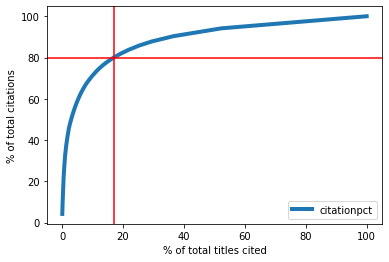

In [26]:
ucblines = citedRefsMeta_ucb_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
ucblines.axhline(y=80, color='r')
ucblines.axvline(x=pctile_ucb, color='r')
ucblines.set_ylabel('% of total citations')
ucblines.set_xlabel('% of total titles cited')
plt.show()

Plot your institution vs the entire group:

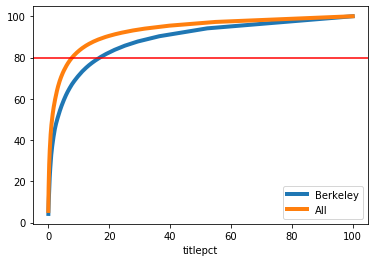

In [27]:
ax = citedRefsMeta_ucb_count.plot(x='titlepct', y='citationpct', linewidth=4, label = 'Berkeley')
citedRefsMeta_count.plot(ax=ax, x='titlepct', y='citationpct', linewidth=4, label = 'All').axhline(y=80, color='r')


Let's go through the other institutions in the study.

# UCLA

In [28]:
citedRefsMeta_ucla = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'UCLA']
citedRefsMeta_ucla_count = citedRefsMeta_ucla['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_ucla_count['cumsum'] = citedRefsMeta_ucla_count['counts'].cumsum()
citedRefsMeta_ucla_count['titlenum'] = range(1, 1+len(citedRefsMeta_ucla_count))
citedRefsMeta_ucla_count['titlenum']


0          1
1          2
2          3
3          4
4          5
        ... 
1180    1181
1181    1182
1182    1183
1183    1184
1184    1185
Name: titlenum, Length: 1185, dtype: int64

In [29]:
citedRefsMeta_ucla_count['titlepct'] = 100*(citedRefsMeta_ucla_count.titlenum/1185)
citedRefsMeta_ucla_count.head(10)

,journal_book,counts,cumsum,titlenum,titlepct
0,Geophysical Research Letters,564,564,1,0.084388
1,Journal of Geophysical Research,515,1079,2,0.168776
2,Journal of Climate,497,1576,3,0.253165
3,Science,306,1882,4,0.337553
4,Journal of Geophysical Research: Space Physics,295,2177,5,0.421941
5,Earth and Planetary Science Letters,242,2419,6,0.506329
6,Nature,239,2658,7,0.590717
7,Journal of the Atmospheric Sciences,232,2890,8,0.675105
8,Geochimica et Cosmochimica Acta,198,3088,9,0.759494
9,Monthly Weather Review,161,3249,10,0.843882


In [30]:
citedRefsMeta_ucla_count['citationpct'] = 100*citedRefsMeta_ucla_count['cumsum']/(10575)
citedRefsMeta_ucla_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Geophysical Research Letters,564,564,1,0.084388,5.333333
1,Journal of Geophysical Research,515,1079,2,0.168776,10.203310
2,Journal of Climate,497,1576,3,0.253165,14.903073
3,Science,306,1882,4,0.337553,17.796690
4,Journal of Geophysical Research: Space Physics,295,2177,5,0.421941,20.586288
...,...,...,...,...,...,...
1180,Journal of Experimental Botany,1,10571,1181,99.662447,99.962175
1181,Forecast Verification,1,10572,1182,99.746835,99.971631
1182,2017 International Conference on Networking an...,1,10573,1183,99.831224,99.981087
1183,Biochimica et Biophysica Acta (BBA) - General ...,1,10574,1184,99.915612,99.990544


In [31]:
ind=np.argmin(abs(80.-citedRefsMeta_ucla_count.citationpct))
pctile_ucla = citedRefsMeta_ucla_count.titlepct[ind]
pctile_ucla

14.936708860759493

# Houston

In [32]:
citedRefsMeta_uh = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'Houston']
citedRefsMeta_uh_count = citedRefsMeta_uh['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_uh_count['cumsum'] = citedRefsMeta_uh_count['counts'].cumsum()
citedRefsMeta_uh_count['titlenum'] = range(1, 1+len(citedRefsMeta_uh_count))
citedRefsMeta_uh_count['titlenum']


0        1
1        2
2        3
3        4
4        5
      ... 
294    295
295    296
296    297
297    298
298    299
Name: titlenum, Length: 299, dtype: int64

In [33]:
citedRefsMeta_uh_count['titlepct'] = 100*(citedRefsMeta_uh_count.titlenum/299)
citedRefsMeta_uh_count.head(10)

,journal_book,counts,cumsum,titlenum,titlepct
0,Earth and Planetary Science Letters,71,71,1,0.334448
1,Geochimica et Cosmochimica Acta,69,140,2,0.668896
2,GEOPHYSICS,45,185,3,1.003344
3,Meteoritics & Planetary Science,39,224,4,1.337793
4,Journal of Geophysical Research,38,262,5,1.672241
5,"Geochemistry, Geophysics, Geosystems",33,295,6,2.006689
6,Nature,33,328,7,2.341137
7,Journal of Geophysical Research: Solid Earth,31,359,8,2.675585
8,Geophysical Research Letters,25,384,9,3.010033
9,Contributions to Mineralogy and Petrology,23,407,10,3.344482


In [34]:
citedRefsMeta_uh_count['citationpct'] = 100*citedRefsMeta_uh_count['cumsum']/(1184)
citedRefsMeta_uh_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Earth and Planetary Science Letters,71,71,1,0.334448,5.996622
1,Geochimica et Cosmochimica Acta,69,140,2,0.668896,11.824324
2,GEOPHYSICS,45,185,3,1.003344,15.625000
3,Meteoritics & Planetary Science,39,224,4,1.337793,18.918919
4,Journal of Geophysical Research,38,262,5,1.672241,22.128378
...,...,...,...,...,...,...
294,The ISME Journal,1,1180,295,98.662207,99.662162
295,Journal of Hydrometeorology,1,1181,296,98.996656,99.746622
296,Advances in Meteorology,1,1182,297,99.331104,99.831081
297,SPE Reservoir Simulation Symposium,1,1183,298,99.665552,99.915541


In [35]:
ind=np.argmin(abs(80.-citedRefsMeta_uh_count.citationpct))
pctile_uh = citedRefsMeta_uh_count.titlepct[ind]
pctile_uh

34.11371237458194

# Boulder

In [36]:
citedRefsMeta_cub = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'CUBoulder']
citedRefsMeta_cub_count = citedRefsMeta_cub['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_cub_count['cumsum'] = citedRefsMeta_cub_count['counts'].cumsum()
citedRefsMeta_cub_count['titlenum'] = range(1, 1+len(citedRefsMeta_cub_count))
citedRefsMeta_cub_count['titlenum']

0          1
1          2
2          3
3          4
4          5
        ... 
1421    1422
1422    1423
1423    1424
1424    1425
1425    1426
Name: titlenum, Length: 1426, dtype: int64

In [37]:
citedRefsMeta_cub_count['titlepct'] = 100*(citedRefsMeta_cub_count.titlenum/1426)
citedRefsMeta_cub_count.head(10)

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,1409,1409,1,0.070126
1,Geophysical Research Letters,1391,2800,2,0.140252
2,Atmospheric Chemistry and Physics,913,3713,3,0.210379
3,Journal of Geophysical Research: Atmospheres,743,4456,4,0.280505
4,Journal of Climate,615,5071,5,0.350631
5,Science,575,5646,6,0.420757
6,Nature,484,6130,7,0.490884
7,Journal of the Atmospheric Sciences,410,6540,8,0.561010
8,Journal of Geophysical Research: Space Physics,331,6871,9,0.631136
9,Bulletin of the American Meteorological Society,282,7153,10,0.701262


In [38]:
citedRefsMeta_cub_count['citationpct'] = 100*citedRefsMeta_cub_count['cumsum']/(19562)
citedRefsMeta_cub_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,1409,1409,1,0.070126,7.202740
1,Geophysical Research Letters,1391,2800,2,0.140252,14.313465
2,Atmospheric Chemistry and Physics,913,3713,3,0.210379,18.980677
3,Journal of Geophysical Research: Atmospheres,743,4456,4,0.280505,22.778857
4,Journal of Climate,615,5071,5,0.350631,25.922707
...,...,...,...,...,...,...
1421,Journal of Herpetology,1,19558,1422,99.719495,99.979552
1422,Environmental Biology of Fishes,1,19559,1423,99.789621,99.984664
1423,Physica Scripta,1,19560,1424,99.859748,99.989776
1424,Biometrika,1,19561,1425,99.929874,99.994888


In [39]:
ind=np.argmin(abs(80.-citedRefsMeta_cub_count.citationpct))
pctile_cub = citedRefsMeta_cub_count.titlepct[ind]
pctile_cub

9.1164095371669

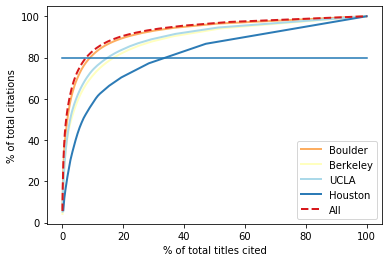

In [79]:

plt.plot('titlepct', 'citationpct', data=citedRefsMeta_cub_count, linewidth=2, color='#fdae61', label = 'Boulder')
plt.plot('titlepct', 'citationpct', data=citedRefsMeta_ucb_count, linewidth=2, color='#ffffbf', label = 'Berkeley')
plt.plot('titlepct', 'citationpct', data=citedRefsMeta_ucla_count, linewidth=2, color='#abd9e9',  label = 'UCLA')
plt.plot('titlepct', 'citationpct', data=citedRefsMeta_uh_count, linewidth=2, color='#2c7bb6', label = 'Houston')
plt.plot('titlepct', 'citationpct', data=citedRefsMeta_count, linewidth=2, ls='--', color='#d7191c', label = 'All')

#d7191c all
#fdae61 boulder
#ffffbf berkeley
#abd9e9 ucla
#2c7bb6 houston

plt.legend()
x_coordinates = [0, 100]
y_coordinates = [80, 80]

plt.plot(x_coordinates, y_coordinates)

plt.ylabel('% of total citations')
plt.xlabel('% of total titles cited')

plt.savefig('8020.png', dpi=300)

### Notes and some references:

*Note: on splitting & stacking method*  
For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://gist.github.com/jlln/338b4b0b55bd6984f883

CrossRef API documentation: https://github.com/CrossRef/rest-api-doc